- $j = \sqrt{-1}$

In [2]:
using Random
using Plots
using Measures

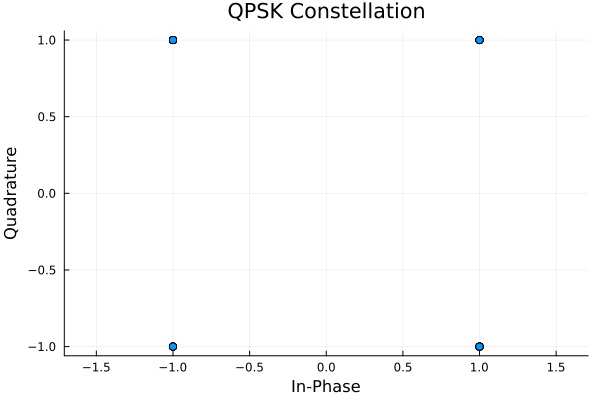

In [5]:
# Define parameters
fs = 1000  # Sampling frequency in Hz
fc = 100   # Carrier frequency in Hz
T = 1      # Signal duration in seconds
num_bits = 100  # Number of bits
Ts = 1 / fs  # Sampling period
t = 0:Ts:T-Ts  # Time vector

# Generate random bits
Random.seed!(42)  # For reproducibility
bits = rand(Bool, num_bits)

# Map bits to QPSK symbols
symbols = [complex(2*(bits[i] == 0) - 1, 2*(bits[i+1] == 0) - 1) for i in 1:2:num_bits-1]

# Upsample symbols (interpolation)
symbols_upsampled = [s for s in symbols for _ in 1:(fs÷fc)]

# Time vector for upsampled symbols
t_upsampled = 0:Ts:(length(symbols_upsampled)-1)*Ts

# Generate QPSK signal
qpsk_signal = real.(symbols_upsampled) .* cos.(2π*fc*t_upsampled) - imag.(symbols_upsampled) .* sin.(2π*fc*t_upsampled)

# Plot the QPSK signal
plot(t_upsampled, qpsk_signal
    , xlabel="Time (s)", ylabel="Amplitude"
    , title="QPSK Signal", legend=false
    , margin = 5mm
)

# Plot the QPSK constellation diagram
scatter(real.(symbols), imag.(symbols)
    , xlabel="In-Phase", ylabel="Quadrature"
    , title="QPSK Constellation", aspect_ratio=:equal, legend=false
)